In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import make_moons
x ,y = make_moons(
    n_samples = 1000,
    noise = 0.4,
    random_state = 86
)

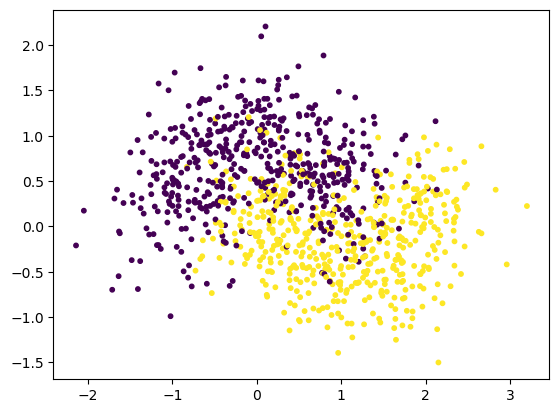

In [8]:
plt.scatter(x[:,0],x[:,1],c = y,s =10)
plt.show()

### Bagging

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    # 指定基学习器为决策树
    n_estimators = 100,
    # 设置基学习器的数量为100个
    bootstrap = True,
    # 启用自助采样（从原始数据集中有放回地采样）构建每个基学习器的训练数据
    max_samples= 500,
    # 个基学习器次啊样的样本数为500
    oob_score = True,
    # 启用袋外数据评分，袋外数据是指自助采样时未被选中地数据，可用于评估模型性能，无需额外划分验证集

    n_jobs = -1,
    random_state = 86
)
bagging.fit(x,y)
bagging.oob_score_

0.849

### Random Forest Trees

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100,
                                 max_samples=500,
                                 # 每个树使用500个样本（类似Bagging的样本抽样）
                                 max_leaf_nodes = 16,
                                 # 限制每棵树最大的叶子节点树，防止过拟合
                                 oob_score = True,
                                 # 启用袋外数据评估
                                 n_jobs = -1,
                                 random_state = 86
                                )
rf_clf.fit(x,y)
rf_clf.oob_score_

0.857

### 提取特征的重要性 feature_importances_

In [38]:
rf_clf.feature_importances_
# 表示模型中各特征的重要性，数值越大，特征对模型预测的影响越大

array([0.42994569, 0.57005431])

In [40]:
from sklearn import datasets

iris = datasets.load_iris()
data_X = iris.data
data_y = iris.target
rf_clf = RandomForestClassifier(n_estimators = 100,
                                 max_leaf_nodes = 16,
                                 oob_score = True,
                                 n_jobs = -1,
                                 random_state = 86
                                )
rf_clf.fit(data_X,data_y)
rf_clf.feature_importances_

array([0.07710546, 0.02826398, 0.38509952, 0.50953104])

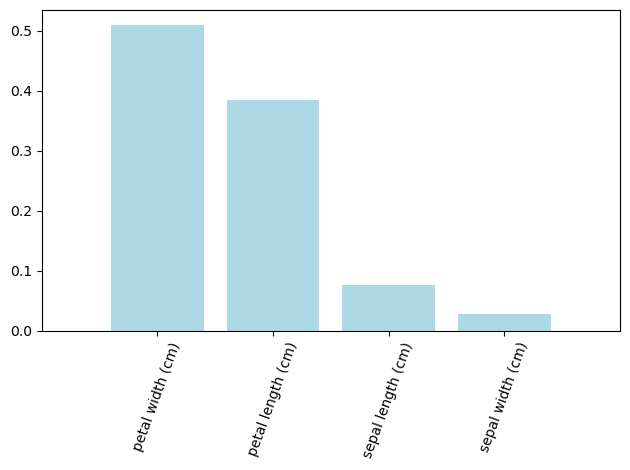

In [56]:
labels = np.array(iris.feature_names)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
# 对特征重要性进行降序排序，获取排序后的索引
plt.bar(range(data_X.shape[1]),importances[indices],color='lightblue',align='center')
# 绘制柱状图，横轴为特征索引，纵轴为重要性数值，颜色设置为浅蓝色，居中对齐
plt.xticks(range(data_X.shape[1]),labels[indices],rotation=70)
# 设置横轴标签为特征名称
# rotation = 70:旋转标签70°，避免标签重叠

plt.xlim([-1,data_X.shape[1]])
# 设置横轴范围，从-1到特征数量
plt.tight_layout()
# 自动调整子图参数，避免元素重叠
plt.show()

### Extra-Trees

In [70]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators = 100,
                            max_samples = 500,
                            bootstrap = True,
                            oob_score =True,
                            n_jobs = -1,
                            random_state = 20)
et_clf.fit(x,y)
et_clf.oob_score_

0.857